In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [20]:
d_s = ml.pqarray([ml.PQ(3.9*u.mm, sigma=0.05*u.mm), ml.PQ(5.20*u.mm, sigma=0.05*u.mm)])
r_s = d_s/2
Re_laminar = ml.PQ(1000, is_const=True)
a_approx = 0.2*r_s*Re_laminar # Примерное расстояние, с которого начнётся ламинарное течение
g = ml.PQ(9.815*u.m/u.s**2, is_const=True)
ro = ml.PQ(1.2047*u.kg/u.m**3, is_const=True)
manom_coef = 9.80665*u.pascal
k = 0.2 # Коэффициент наклона трубки ММН

In [21]:
data = pd.read_csv('lab1.3.3.csv')
data

,delta_P,sigma_delta_P,delta_V,delta_T,delta_l,delta_P.1,sigma_delta_P.1,delta_V.1,delta_T.1,delta_l.1
0,10,1,0.5,35.00,11.2,10.0,1.0,1.0,26.25,11.5
1,20,1,1.0,37.00,30.0,15.0,1.0,1.0,16.84,30.0
2,30,1,1.0,25.00,40.0,20.0,1.0,1.0,12.87,40.0
3,40,1,1.0,18.50,50.0,25.0,1.0,1.0,10.00,50.0
4,50,1,1.0,14.62,NaN,30.0,1.0,1.0,8.57,NaN
5,60,1,1.0,12.69,NaN,35.0,1.0,1.0,7.46,NaN
6,70,1,1.0,10.91,NaN,40.0,2.0,2.0,14.28,NaN
7,80,2,1.0,9.87,NaN,53.0,2.0,2.0,13.13,NaN
8,93,2,2.0,19.34,NaN,73.0,3.0,2.0,11.97,NaN
9,105,3,2.0,19.14,NaN,93.0,3.0,2.0,10.56,NaN


In [25]:
# Деления
ticks_s = [ml.pqarray([ml.PQ(val, sigma=sigma) for val, sigma in zip(data['delta_P'].dropna().astype(float),
                                                                   data['sigma_delta_P'].dropna().astype(float))]),
           ml.pqarray([ml.PQ(val, sigma=sigma) for val, sigma in zip(data['delta_P.1'].dropna().astype(float),
                                                              data['sigma_delta_P.1'].dropna().astype(float))])]
dP_s = [(ticks*manom_coef*k).repr_as(u.pascal) for ticks in ticks_s]
#print('P:', dP_s)
dV_s = [ml.pqarray([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) 
                  for val in data['delta_V'].dropna().astype(float)]),
        ml.pqarray([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) 
                  for val in data['delta_V.1'].dropna().astype(float)])]
#print('dV', dV_s)
dT_s = [ml.pqarray([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) 
                  for val in data['delta_T'].dropna().astype(float)]),
        ml.pqarray([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) 
                  for val in data['delta_T.1'].dropna().astype(float)])]
#print('dT', dT_s)
Q_s = [dV/dT for (dV, dT) in zip(dV_s, dT_s)]
#print('Q', Q_s)

delta_l_s = [ml.pqarray([ml.PQ(val*u.cm, sigma=0.5*u.cm) for val in data['delta_l'].dropna().astype(float)]),
             ml.pqarray([ml.PQ(val*u.cm, sigma=0.5*u.cm) for val in data['delta_l.1'].dropna().astype(float)])]
l_s = [np.cumsum(delta_l) for delta_l in delta_l_s]
#print(l_s)

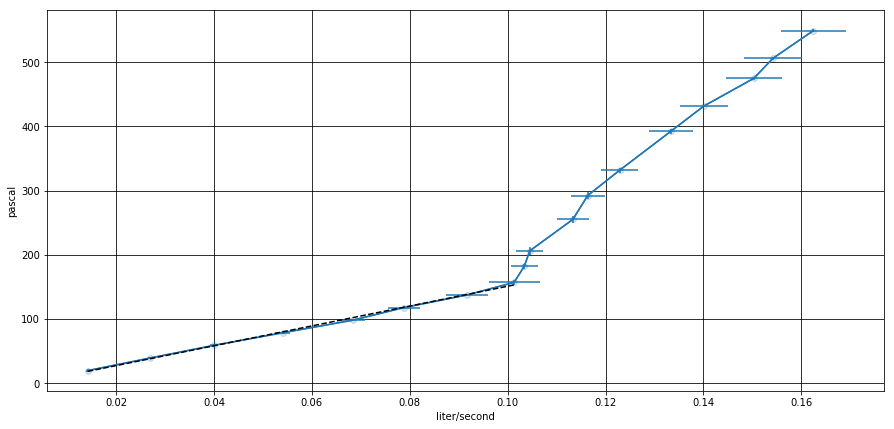

k 1546.07864887
eta 0.000018±0.000001 pascal*second (5.22%)


,Q,dP,dT,dV
0,0.0143±0.0004 liter/second (2.46%),19.6±2.0 pascal (10.00%),35.0±0.5 second (1.43%),0.500±0.010 liter (2.00%)
1,0.0270±0.0005 liter/second (1.68%),39.2±2.0 pascal (5.00%),37.0±0.5 second (1.35%),1.000±0.010 liter (1.00%)
2,0.0400±0.0009 liter/second (2.24%),58.8±2.0 pascal (3.33%),25.0±0.5 second (2.00%),1.000±0.010 liter (1.00%)
3,0.0541±0.0016 liter/second (2.88%),78.5±2.0 pascal (2.50%),18.5±0.5 second (2.70%),1.000±0.010 liter (1.00%)
4,0.0684±0.0024 liter/second (3.56%),98.1±2.0 pascal (2.00%),14.6±0.5 second (3.42%),1.000±0.010 liter (1.00%)
5,0.079±0.003 liter/second (4.07%),117.7±2.0 pascal (1.67%),12.7±0.5 second (3.94%),1.000±0.010 liter (1.00%)
6,0.092±0.004 liter/second (4.69%),137.3±2.0 pascal (1.43%),10.9±0.5 second (4.58%),1.000±0.010 liter (1.00%)
7,0.101±0.005 liter/second (5.16%),157±4 pascal (2.50%),9.9±0.5 second (5.07%),1.000±0.010 liter (1.00%)
8,0.103±0.003 liter/second (2.63%),182±4 pascal (2.15%),19.3±0.5 second (2.59%),2.000±0.010 liter (0.50%)
9,0.104±0.003 liter/second (2.66%),206±6 pascal (2.86%),19.1±0.5 second (2.61%),2.000±0.010 liter (0.50%)


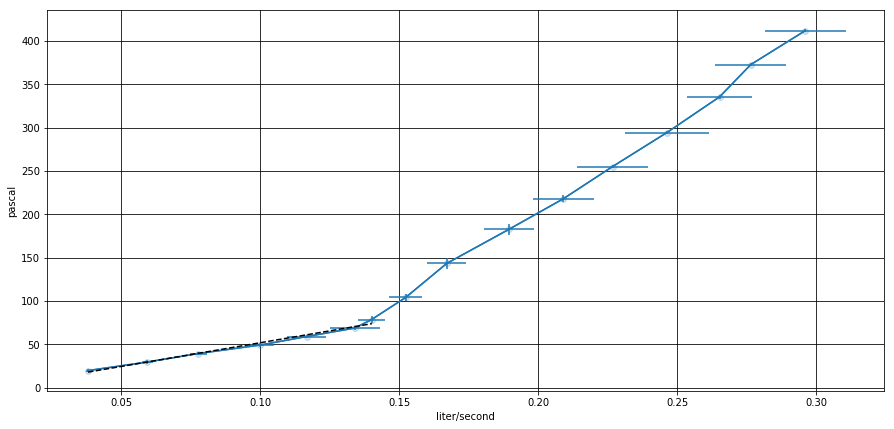

k 547.249108696
eta 0.000020±0.000001 pascal*second (3.97%)


,Q,dP,dT,dV
0,0.0381±0.0008 liter/second (2.15%),19.6±2.0 pascal (10.00%),26.2±0.5 second (1.90%),1.000±0.010 liter (1.00%)
1,0.0594±0.0019 liter/second (3.13%),29.4±2.0 pascal (6.67%),16.8±0.5 second (2.97%),1.000±0.010 liter (1.00%)
2,0.078±0.003 liter/second (4.01%),39.2±2.0 pascal (5.00%),12.9±0.5 second (3.89%),1.000±0.010 liter (1.00%)
3,0.100±0.005 liter/second (5.10%),49.0±2.0 pascal (4.00%),10.0±0.5 second (5.00%),1.000±0.010 liter (1.00%)
4,0.117±0.007 liter/second (5.92%),58.8±2.0 pascal (3.33%),8.6±0.5 second (5.83%),1.000±0.010 liter (1.00%)
5,0.134±0.009 liter/second (6.78%),68.6±2.0 pascal (2.86%),7.5±0.5 second (6.70%),1.000±0.010 liter (1.00%)
6,0.140±0.005 liter/second (3.54%),78±4 pascal (5.00%),14.3±0.5 second (3.50%),2.000±0.010 liter (0.50%)
7,0.152±0.006 liter/second (3.84%),104±4 pascal (3.77%),13.1±0.5 second (3.81%),2.000±0.010 liter (0.50%)
8,0.167±0.007 liter/second (4.21%),143±6 pascal (4.11%),12.0±0.5 second (4.18%),2.000±0.010 liter (0.50%)
9,0.189±0.009 liter/second (4.76%),182±6 pascal (3.23%),10.6±0.5 second (4.73%),2.000±0.010 liter (0.50%)


In [26]:
for Q, dP, dV, dT, r, lens, laminar_border in zip(Q_s, dP_s, dV_s, dT_s, r_s, delta_l_s, [8, 7]):
    new_data = pd.DataFrame({
        'dP':dP,
        'dV':dV,
        'dT':dT,
        'Q':Q
    })
    l = lens[3]
    plt.figure(figsize=(15, 7))
    ml.plt_pq(Q, dP)
    ml.plot_OLS(Q[:laminar_border], dP[:laminar_border])
    plt.show()
    
    ols_coefs, ols_errors = ml.OLS(Q[:laminar_border], dP[:laminar_border])
    print('k', ols_coefs[0])

    eta = ml.eval(u.pascal*u.s, lambda r, l, coef:np.pi*r**4/(8*l)*coef*(u.pascal*u.s)/u.liters, r, l, ols_coefs[0])
    print('eta', eta)
    display(new_data)
# Тут смотрим, когда кончается прямая, и отрезаем ненужное

In [9]:
# Для переходной области 
i_border = 5
Re = Q[i_border]*ro/(np.pi*r*eta)
print(Re)

calculated_radius = [8*l*eta/(np.pi*ols_coefs[0])/(u.pascal*u.s)*u.liter]
all_r_s = [r]

1010±80 kilogram*liter/(meter**3*millimeter*pascal*second**2) (7.91%)
derived_dim centimeter (pascal, second)


In [10]:
# 6. Для гарантированно ламинарного течения измеряем распределение давления вдоль трубки.

In [14]:
Q_exper_s = [ml.PQ(1*u.l/(16.40*u.s), sigma=0.01), ml.PQ(1*u.l/(12.03*u.s), sigma=0.01)]
ticks_s = [ml.pqarray([ml.PQ(val, sigma=0.5) for val in 
                     [31, 62, 106, 153]]),
           ml.pqarray([ml.PQ(val, sigma=0.5) for val in 
                     [20, 34, 51, 71]])]
P_s = [(ticks*manom_coef*k).repr_as(u.pascal) for ticks in ticks_s]
print('P:', P_s)

P: [pqarray([60.8±1.0 pascal (1.61%), 121.6±1.0 pascal (0.81%),
         207.9±1.0 pascal (0.47%), 300.1±1.0 pascal (0.33%)], dtype=object), pqarray([39.2±1.0 pascal (2.50%), 66.7±1.0 pascal (1.47%),
         100.0±1.0 pascal (0.98%), 139.3±1.0 pascal (0.70%)], dtype=object)]


[0.00±0.10 pascal (1000000.00%) 60.8±1.4 pascal (2.28%)
 86.3±1.4 pascal (1.61%) 92.2±1.4 pascal (1.50%)]


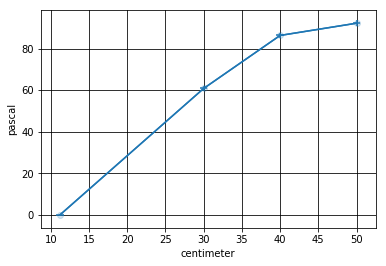

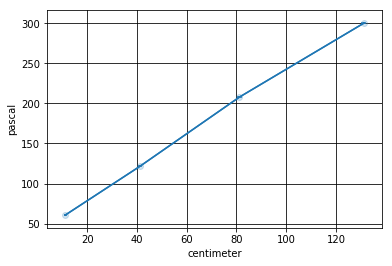

[0.00±0.10 pascal (1000000.00%) 27.5±1.4 pascal (5.05%)
 33.3±1.4 pascal (4.16%) 39.2±1.4 pascal (3.54%)]


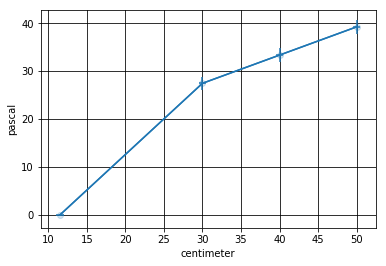

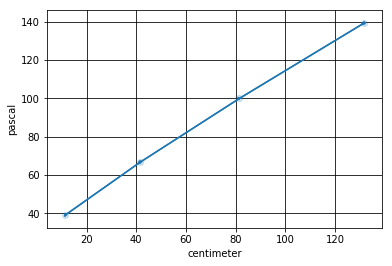

In [15]:
for delta_l, l, P in zip(delta_l_s, l_s, P_s):
    delta_P = ml.pqarray([ml.PQ(0.00001*u.pascals, sigma=0.1*u.pascal, dim=u.pascal)]+list(P[1:]-P[:-1]))
    print(delta_P)
    ml.plt_pq(delta_l, delta_P)
    plt.show()
    #ml.plt_pq(delta_l, dP)
    #plt.show()
    ml.plt_pq(l, P)
    plt.show()